In [6]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
# Importing the dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# Employing the Thompson Sampling algorithm
N = 10000 # number of users
d = 10 # number of ads

ads_selected = []
total_reward = 0
Ni_1 = np.zeros(d) # number of times i got reward=1
Ni_0 = np.zeros(d) # number of times i got reward=0

In [4]:
for n in range(0, N):
    ad = 0
    max_theta = 0
    for i in range(0, d):
        theta_i = random.betavariate(Ni_1[i] + 1, Ni_0[i] + 1)
        if theta_i > max_theta:
            max_theta = theta_i
            ad = i
            
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        Ni_1[ad] += 1
    else:
        Ni_0[ad] += 1
    total_reward += reward

Text(0, 0.5, 'Number of times each ad was selected')

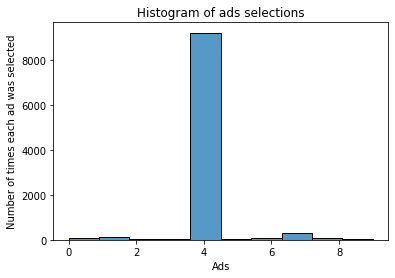

In [7]:
sns.histplot(ads_selected, bins=10)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')